In [50]:
import torch
import numpy as np
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import random

Linear Regression Workflow with Torch

In [51]:
RANDOM_SEED=35
torch.manual_seed(seed=RANDOM_SEED)

In [52]:
weight = 2
bias = 0.6
X = torch.rand(size=(20,1))
Y = X*weight + bias
X_train, X_test = X[0:12], X[12:]
Y_train, Y_test = Y[0:12], Y[12:]

In [53]:
def plotting(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test, predictions=None):
    plt.figure(figsize=(20, 20))
    plt.scatter(X_train, Y_train, c="cyan", s=200, label="Training Data")
    plt.plot(X_train, Y_train, color='red', linestyle='-', linewidth=1)
    plt.scatter(X_test, Y_test, c="green", s=200, label="Test Data")
    plt.plot(X_test, Y_test, color='red', linestyle='-', linewidth=1)
    if predictions is not None:
        plt.scatter(X_test, predictions, c="blue", s=100, label="Predictions")
        plt.plot(X_test, predictions, color='blue', linestyle='-', linewidth=1)
    return 0

0

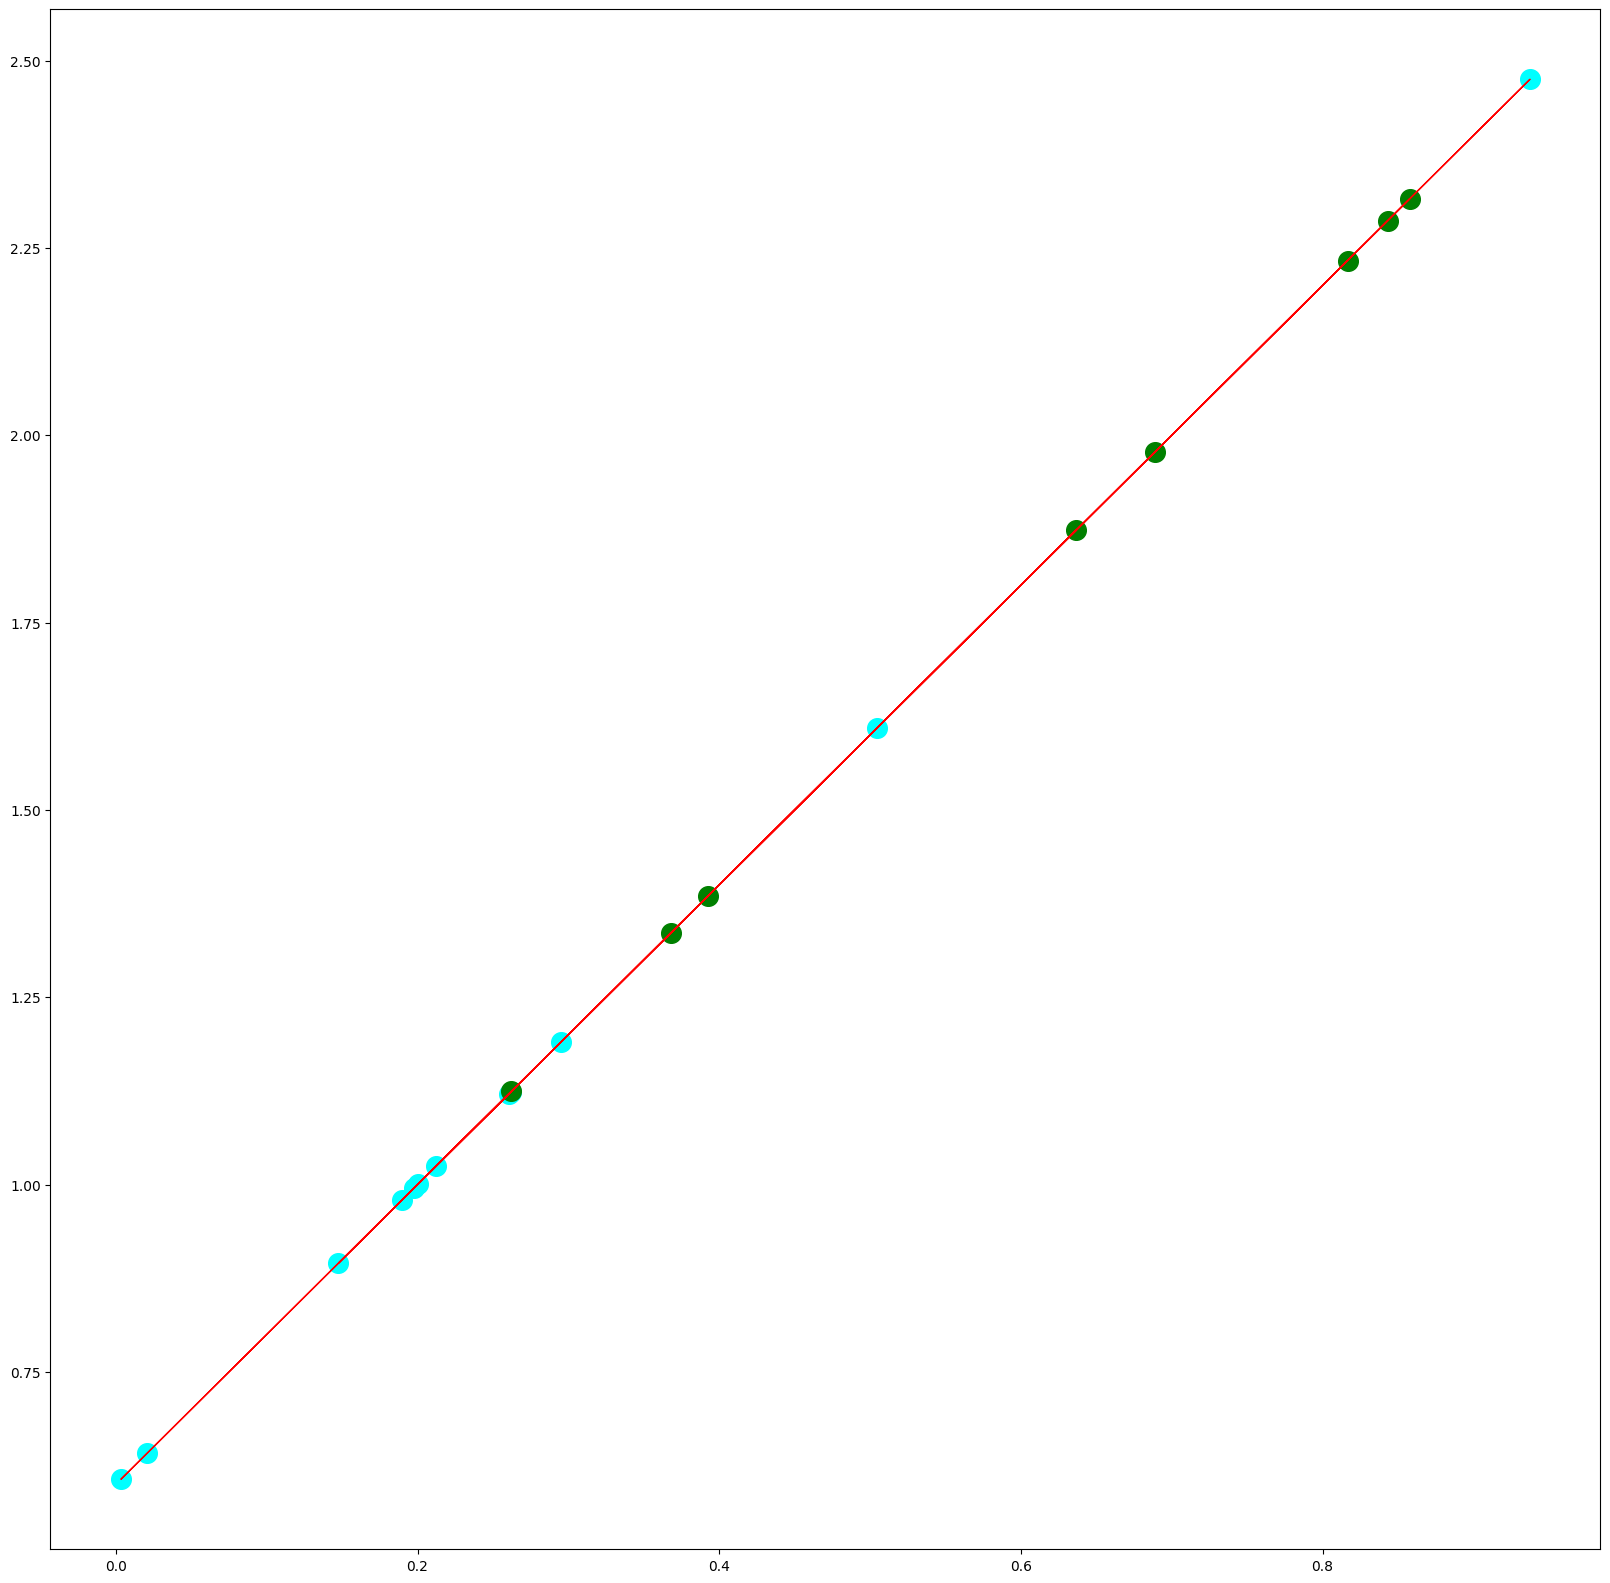

In [54]:
plotting()

In [55]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weights = torch.nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)
        self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    
model_lr=LinearRegressionModel()
loss_function=nn.MSELoss()
optimizer=torch.optim.SGD(model_lr.parameters(), lr=0.01, momentum=0.9)
epochs=300

epoch_count  = []
train_loss_vals = []
test_loss_vals = []

for epoch in range(epochs):

    model_lr.train()
    optimizer.zero_grad()
    X_predicted = model_lr(X_train)
    loss_train = loss_function(X_predicted, Y_train)
    loss_train.backward()
    optimizer.step()

    model_lr.eval()
    with torch.inference_mode():
        preds = model_lr(X_test)
        loss_test = loss_function(Y_test, preds.type(torch.float))

        if epoch%10 == 0:
            epoch_count.append(epoch)
            train_loss_vals.append(loss_train)
            test_loss_vals.append(loss_test)
            print(f"Epoch: {epoch}, Train_Loss: {loss_train}, Test_Loss: {loss_test}")





Epoch: 0, Train_Loss: 9.255768775939941, Test_Loss: 15.169981002807617
Epoch: 10, Train_Loss: 0.8374513983726501, Test_Loss: 1.6118042469024658
Epoch: 20, Train_Loss: 0.9834520816802979, Test_Loss: 0.3070179224014282
Epoch: 30, Train_Loss: 0.33881476521492004, Test_Loss: 0.12202511727809906
Epoch: 40, Train_Loss: 0.16647489368915558, Test_Loss: 0.6470807790756226
Epoch: 50, Train_Loss: 0.12924803793430328, Test_Loss: 0.4343690872192383
Epoch: 60, Train_Loss: 0.07337825745344162, Test_Loss: 0.14893926680088043
Epoch: 70, Train_Loss: 0.06261801719665527, Test_Loss: 0.10689925402402878
Epoch: 80, Train_Loss: 0.04489782452583313, Test_Loss: 0.12525856494903564
Epoch: 90, Train_Loss: 0.03629947826266289, Test_Loss: 0.11132199317216873
Epoch: 100, Train_Loss: 0.028194725513458252, Test_Loss: 0.07695312798023224
Epoch: 110, Train_Loss: 0.022387390956282616, Test_Loss: 0.05614440143108368
Epoch: 120, Train_Loss: 0.01768437586724758, Test_Loss: 0.04652359336614609
Epoch: 130, Train_Loss: 0.0140

In [56]:

model_lr.eval()
with torch.inference_mode():
  y_preds = model_lr(X_test)
y_preds

tensor([[1.3301],
        [2.2475],
        [2.2759],
        [1.1261],
        [1.8491],
        [1.3772],
        [2.1964],
        [1.9501]])

In [57]:
print("The model learned the following values for weights and bias:")
print(model_lr.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([1.9311]), 'bias': tensor([0.6196])})

And the original values for weights and bias are:
weights: 2, bias: 0.6


0

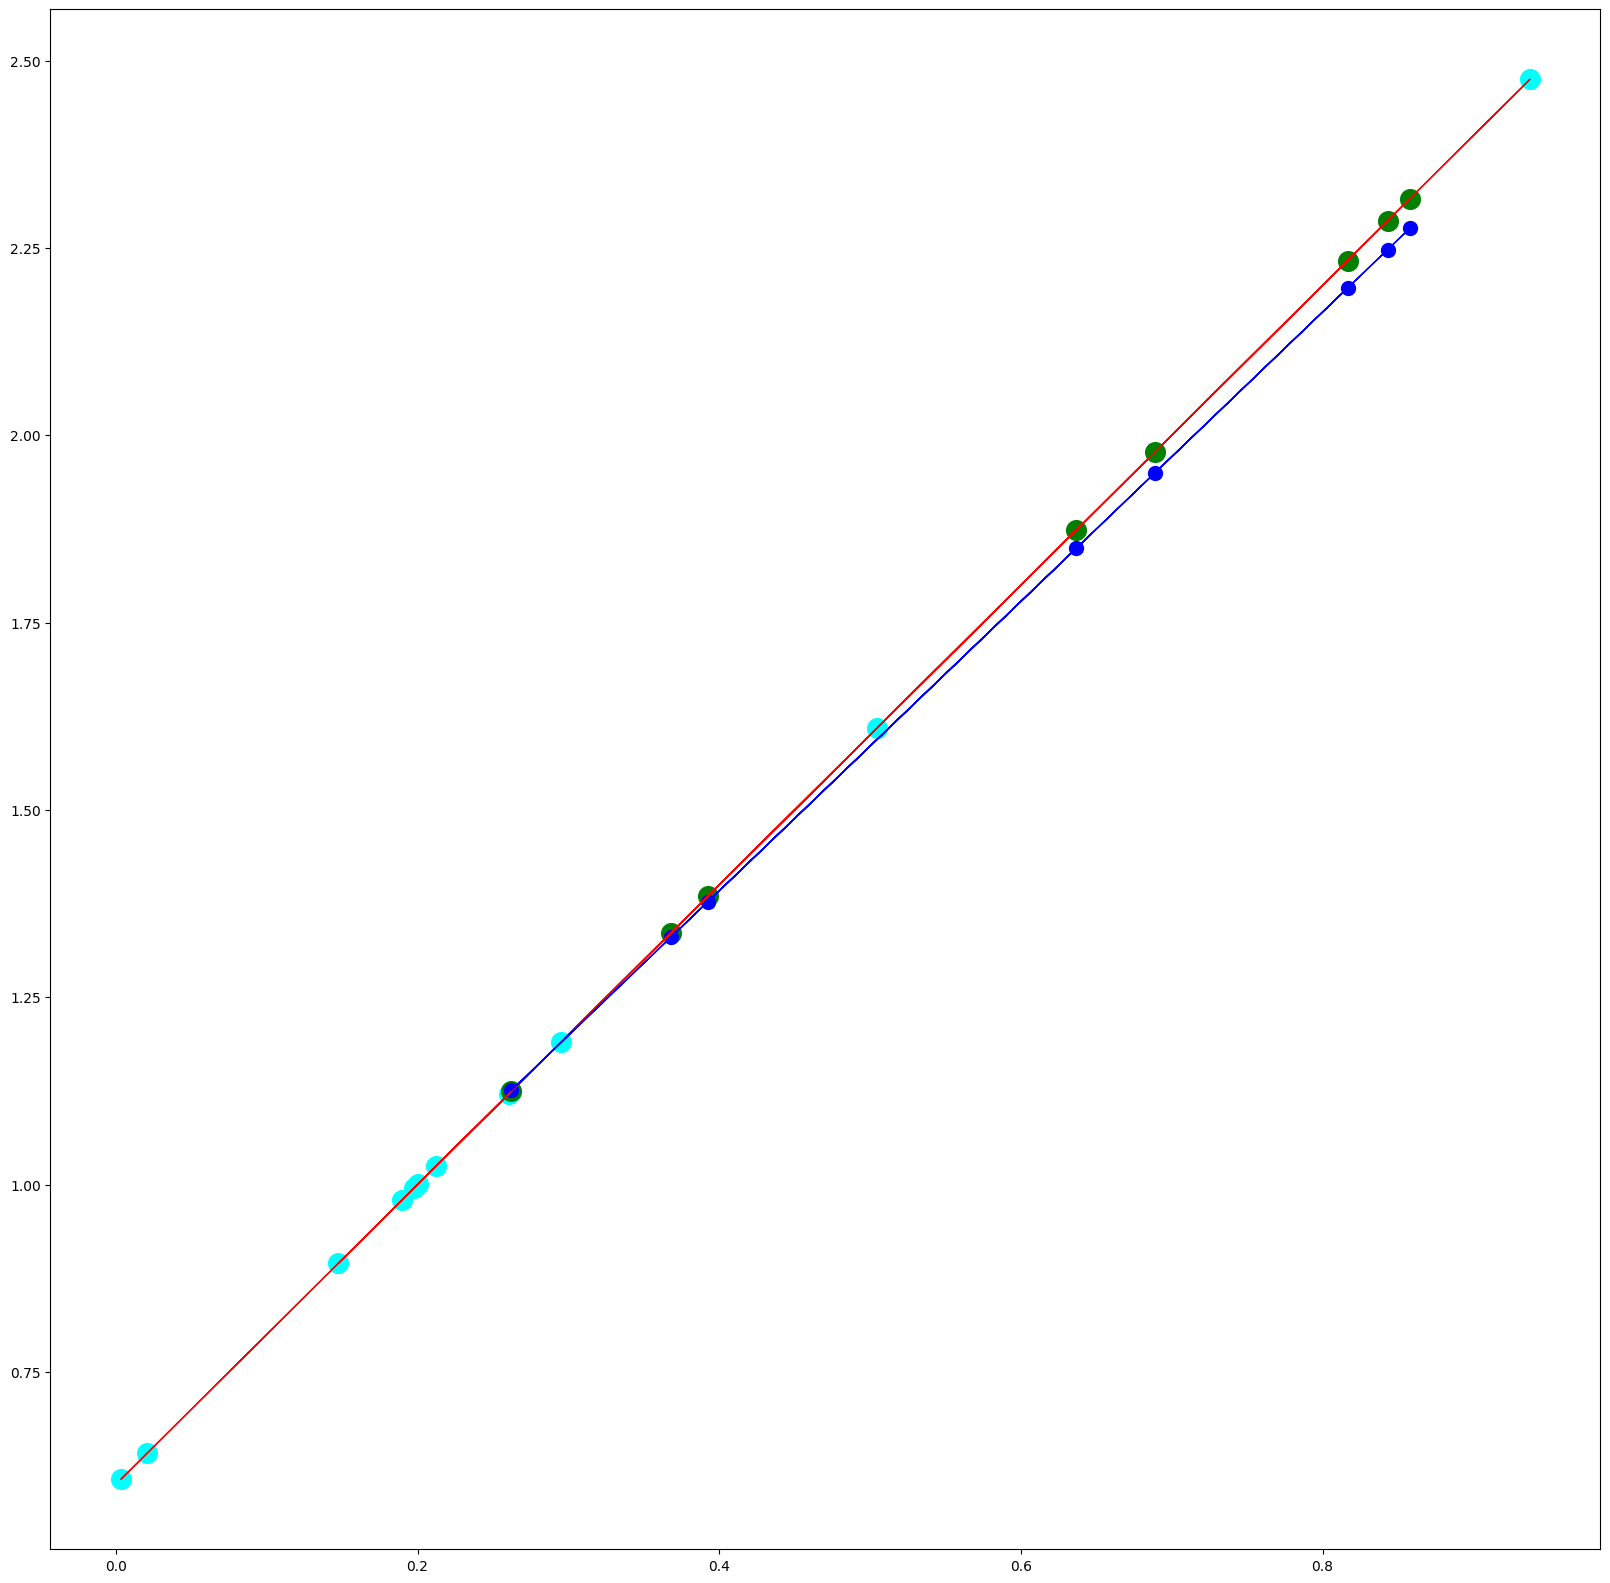

In [58]:
plotting(predictions=y_preds)

In [59]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_lr.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [60]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>